# **Hypothesis Testing with Insurance Data (Core)**

- Yvon Bilodeau
- May 2022

For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

## **Import Libraries**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## **Import Data**

In [2]:
# Load the dataframe from the csv file
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')

In [3]:
# Display the first (5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Questions**

### **Q1. Do smokers have higher insurance charges than non-smokers?**

In [4]:
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']].copy()
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [5]:
len(smoker_df)

274

In [6]:
nonsmoker_df = df.loc[df.smoker =='no', ['smoker','charges']].copy()
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [7]:
len(nonsmoker_df)

1064

In [8]:
q1_plot_df = pd.concat([smoker_df, nonsmoker_df], axis=0).copy()

#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis** 
 - _No statistical significance exists._
 - No significant difference in insurance costs exists between smokers and non-smokers.


- **HA Alternate Hypothesis**
 - _A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..._
 - A significant difference in insurance costs exists between smokers and non-smokers.

In [9]:
ho_desc = 'No statistical significance exists. The null hypothesis was not rejected.'
ha_desc = 'A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..'

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Numeric_
- **Number of Samples/Groups being compared**
 - _2_
   - _smoker_
   - _nonsmoker_
- **Correct Test**
 - _2 Sample T-Test_

#### **Test the assumptions of your selected test.**

##### **Assumption - No significant outliers**


In [10]:
smoker_group = smoker_df['charges']
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

- no outliers to remove

In [11]:
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

- 24 outliers to remove

In [12]:
len(nonsmoker_group)

1064

In [13]:
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
len(nonsmoker_group)

1040

##### **Assumption - Normality**


In [14]:
# This function tests the null hypothesis that -
h0 = "The sample comes from a normal distribution."
ha = "The sample does not come from a normal distribution."
group = smoker_group
statistic, pvalue = stats.normaltest(group)

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)    

The p-value for the test was 5.564930630036463e-14
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
The sample does not come from a normal distribution.


In [15]:
# This function tests the null hypothesis that -
h0 = "The sample comes from a normal distribution."
ha = "The sample does not come from a normal distribution."
group = nonsmoker_group
statistic, pvalue = stats.normaltest(group)

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)  

The p-value for the test was 2.6945416315543976e-36
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
The sample does not come from a normal distribution.


In [16]:
len(smoker_group)

274

In [17]:
len(nonsmoker_group)

1040

- We have large enough groups that we can safely disregard the assumption of normality.

##### **Assumption Equal Variance**

In [18]:
# This function tests the null hypothesis that -
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
alpha = .05
statistic, pvalue = stats.levene(smoker_group, nonsmoker_group)

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)      

The p-value for the test was 2.4247238784347824e-97
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
All input samples are not from populations with equal variances.


It did not pass the Equal Variance Test:
- the 2 Sample T-Test cannot be used.
- the Welch's T-Test must be used.

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions) and**
**Interpret your p-value and reject or fail to reject your null hypothesis**

In [19]:
ho = 'No significant difference in insurance costs exists between smokers and non-smokers.'
ha = 'A significant difference in insurance costs exists between smokers and non-smokers.'

In [20]:
statistic, pvalue = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False) #double check equal_var=True/False

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)

The p-value for the test was 2.575322662587431e-104
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
A significant difference in insurance costs exists between smokers and non-smokers.


#### **Show a supporting visualization that helps display the result**

In [21]:
q1_plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


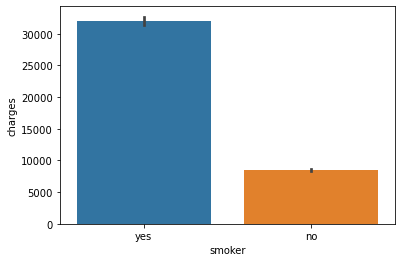

In [22]:
sns.barplot(data=q1_plot_df, x='smoker', y='charges', ci=68.2);

### **Q2. Are men more likely to smoke than women?**


In [23]:
# Display the first (5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
men_df = df.loc[df.sex =='male', ['sex','smoker']].copy()
men_df.head()

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no


In [25]:
len(men_df)

676

In [26]:
women_df = df.loc[df.sex =='female', ['sex','smoker']].copy()
women_df.head()

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no


In [27]:
len(women_df)

662

In [28]:
q2_plot_df = pd.concat([men_df, women_df], axis=0).copy()

#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis**
 - _No statistical significance exists._
 - No significant difference exists in the likelihood of men than women to be smokers.


- **HA Alternate Hypothesis**
 - _Statistical significance exists._
 - A significant difference exists in the likelihood of men than women to be smokers.

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Categorical_
- **Number of Samples/Groups being compared**
 - _2_
- **Correct Test**
 - _Chi-Square_

#### **Test the assumptions of your selected test.**

##### **There are two categorical variables**


  - Men
  - Women


##### **The outcomes are independent**

- Confirmed, the outcomes are independent.

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions) and**
**Interpret your p-value and reject or fail to reject your null hypothesis**

In [29]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [30]:
ho = 'No significant difference exists in the likelihood of men than women to be smokers.'
ha = 'A significant difference exists in the likelihood of men than women to be smokers.'

In [31]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, pvalue, deg_free, expected_vals = result # this labels the results

In [32]:
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so \n')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so \n')
    print(ho_desc)
    print(ho)

The p-value for the test was 0.006548143503580696
It was < the alpha value of 0.05, so 

A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
A significant difference exists in the likelihood of men than women to be smokers.


#### **Show a supporting visualization that helps display the result**

In [33]:
q2_plot_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


In [34]:
grouped = q2_plot_df.groupby(['sex'], sort=False)
smoker_counts = grouped['smoker'].value_counts(normalize=True, sort=False)
smoker_data = [{'smoker': smoker, 'sex': sex, 'percentage': percentage*100} for 
    (smoker, sex), percentage in dict(smoker_counts).items()]
smoker_df = pd.DataFrame(smoker_data)

In [35]:
smoker_df

,smoker,sex,percentage
0,male,no,76.479290
1,male,yes,23.520710
2,female,no,82.628399
3,female,yes,17.371601


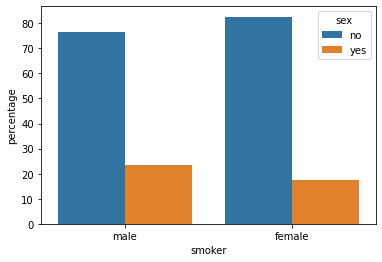

In [36]:
p = sns.barplot(x="smoker", y="percentage", hue="sex", data=smoker_df)

### **Q3. Do different regions have different charges, on average?**

#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis**
 - _No statistical significance exists._
 - No significant difference in charges exists between regions.


- **H1 Alternate Hypothesis**
 - _Statistical significance exists._
 - A significant difference in charges exists between regions.

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Numeric_
- **Number of Samples/Groups being compared**
 - _more than 2_
- **Correct Test**
 - if parametric: 
   - _ANOVA and/or Tukey_
 - if nonparametric: 
   - _Kruskal-Wallis_

#### **Test the assumptions of your selected test.**

##### **Assumption - No significant outliers**

In [37]:
groups = {}
for region in df['region'].unique():
    temp_df = df.loc[df['region'] == region, 'charges']
    groups[region] = temp_df
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [38]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [39]:
for region, data in groups.items():
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} outliers were removed from the {region} group.")
    # Remove the outliers
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group.
2 outliers were removed from the southeast group.
7 outliers were removed from the northwest group.
4 outliers were removed from the northeast group.


- The outlier assumption is satisfied now that outliers have been removed.

##### **Assumption - Normality**

In [40]:
# Loop through the groups and obtain
# group count and the pvalue of the Normal Test
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                       'p':p}

In [41]:
# Display a dataframe created from the norm_results dictonary and transpose it 
pd.DataFrame(norm_results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [42]:
# Create and display a dataframe created from the norm_results dictonary and transpose it 
norm_results_df = pd.DataFrame(norm_results).T
# Add a column to indicate if the group pvalue was significant or not
norm_results_df['sig?'] = norm_results_df['p'] < .05

In [43]:
# Display the dataframe
norm_results_df

,n,p,sig?
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


- We have large enough groups (each n>20) that we can safely disregard the assumption of normality, even though:
- The groups do NOT come from normal distributions.


##### **Assumption Equal Variance**

In [44]:
# This function tests the null hypothesis that -
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
alpha = .05
statistic, pvalue = stats.levene(*groups.values())

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)    

The p-value for the test was 3.2035503711783993e-06
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected and the alternative is supported that..
All input samples are not from populations with equal variances.


- The groups did not satisfy the Assumption for Variance, so we will not run the One-Way ANOVA test, we will use the Kruskal Test.

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions) and**
**Interpret your p-value and reject or fail to reject your null hypothesis**

In [45]:
ho = 'No significant difference in charges exists between regions.'
ha = 'A significant difference in charges exists between regions.'

In [46]:
# Running Kruskal Test for Original Hypothesis
statistic, pvalue = stats.kruskal(*groups.values())

alpha = .05
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(ho)

The p-value for the test was 0.07468847911322242
It was > the alpha value of 0.05, so
No statistical significance exists. The null hypothesis was not rejected.
No significant difference in charges exists between regions.


#### **Show a supporting visualization that helps display the result**

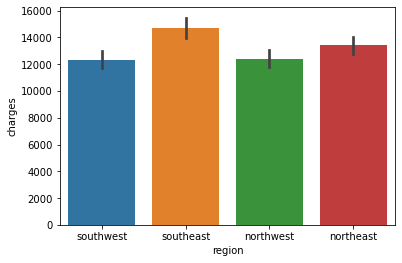

In [47]:
sns.barplot(data=df, x='region', y='charges', ci=68);